In [13]:
import tensorflow as tf 
import warnings
warnings.filterwarnings("ignore") 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2 

In [14]:
# Image data generator with rescaling initilization 
trainData_generator = ImageDataGenerator(rescale = 1./255) 
testData_generator = ImageDataGenerator(rescale = 1./255)

# Preprocessing Image Data

In [18]:
train_generator = trainData_generator.flow_from_directory(
"Dataset/FER2013/train",
target_size = (48, 48),
batch_size = 64,
color_mode = "grayscale",
class_mode = "categorical")

test_generator = testData_generator.flow_from_directory(
"Dataset/FER2013/test",
target_size = (48, 48),
batch_size = 64,
color_mode = "grayscale",
class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

# Model Fitting

In [21]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu', input_shape=(48, 48, 1)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
 
cnn_model.add(Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
 
cnn_model.add(Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(7, activation='softmax'))

cnn_model.summary()

cnn_model.compile(optimizer= "adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = cnn_model.fit(x=train_generator,
                        steps_per_epoch=28709 // 64,
                        epochs = 60,
                        validation_data=test_generator,
                        validation_steps=7178 // 64,
                        shuffle=True,
                        callbacks=[lr_scheduler])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,239 (5.05 MB)

 Trainable params: 1,322,919 (5.05 MB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 186s 413ms/step - accuracy: 0.2587 - loss: 4.2340 - val_accuracy: 0.3376 - val_loss: 2.2480 - learning_rate: 0.0010
Epoch 2/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.4375 - loss: 1.9894 - val_accuracy: 0.3000 - val_loss: 2.2673 - learning_rate: 0.0010
Epoch 3/60


2024-04-15 22:20:37.061588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:20:37.092104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 186s 415ms/step - accuracy: 0.4345 - loss: 1.8140 - val_accuracy: 0.4558 - val_loss: 1.5849 - learning_rate: 0.0010
Epoch 4/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.3906 - loss: 1.6843 - val_accuracy: 0.5000 - val_loss: 1.5885 - learning_rate: 0.0010
Epoch 5/60


2024-04-15 22:23:43.524789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:23:43.548095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 186s 416ms/step - accuracy: 0.4813 - loss: 1.5237 - val_accuracy: 0.4883 - val_loss: 1.4974 - learning_rate: 0.0010
Epoch 6/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 112us/step - accuracy: 0.5469 - loss: 1.2934 - val_accuracy: 0.7000 - val_loss: 1.0491 - learning_rate: 0.0010
Epoch 7/60


2024-04-15 22:26:50.443078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:26:50.477669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 187s 417ms/step - accuracy: 0.5048 - loss: 1.4548 - val_accuracy: 0.5095 - val_loss: 1.4375 - learning_rate: 0.0010
Epoch 8/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - accuracy: 0.4844 - loss: 1.4148 - val_accuracy: 0.4000 - val_loss: 1.2921 - learning_rate: 0.0010
Epoch 9/60


2024-04-15 22:29:58.151003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:29:58.210792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 192s 429ms/step - accuracy: 0.5220 - loss: 1.4177 - val_accuracy: 0.5345 - val_loss: 1.3922 - learning_rate: 0.0010
Epoch 10/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.5000 - loss: 1.4955 - val_accuracy: 0.5000 - val_loss: 1.3824 - learning_rate: 0.0010
Epoch 11/60


2024-04-15 22:33:10.668639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:33:10.737390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 181s 404ms/step - accuracy: 0.5370 - loss: 1.3868 - val_accuracy: 0.5011 - val_loss: 1.4549 - learning_rate: 0.0010
Epoch 12/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.5938 - loss: 1.3160 - val_accuracy: 0.3000 - val_loss: 1.6529 - learning_rate: 0.0010
Epoch 13/60


2024-04-15 22:36:12.055387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:36:12.078154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.5398 - loss: 1.3817
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
448/448 ━━━━━━━━━━━━━━━━━━━━ 299s 668ms/step - accuracy: 0.5398 - loss: 1.3817 - val_accuracy: 0.5067 - val_loss: 1.4532 - learning_rate: 0.0010
Epoch 14/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.6094 - loss: 1.2587 - val_accuracy: 0.5000 - val_loss: 1.2895 - learning_rate: 5.0000e-04
Epoch 15/60


2024-04-15 22:41:11.233634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:41:11.256709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 389ms/step - accuracy: 0.5767 - loss: 1.2774 - val_accuracy: 0.5770 - val_loss: 1.2374 - learning_rate: 5.0000e-04
Epoch 16/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.5938 - loss: 1.2534 - val_accuracy: 0.4000 - val_loss: 1.2713 - learning_rate: 5.0000e-04
Epoch 17/60


2024-04-15 22:44:05.981298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:44:06.002606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 173s 386ms/step - accuracy: 0.5850 - loss: 1.2289 - val_accuracy: 0.5809 - val_loss: 1.2367 - learning_rate: 5.0000e-04
Epoch 18/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.6562 - loss: 1.1235 - val_accuracy: 1.0000 - val_loss: 0.8341 - learning_rate: 5.0000e-04
Epoch 19/60


2024-04-15 22:46:59.494148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:46:59.521599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 175s 389ms/step - accuracy: 0.5927 - loss: 1.2036 - val_accuracy: 0.5625 - val_loss: 1.2829 - learning_rate: 5.0000e-04
Epoch 20/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.5625 - loss: 1.4759 - val_accuracy: 0.6000 - val_loss: 0.9386 - learning_rate: 5.0000e-04
Epoch 21/60


2024-04-15 22:49:54.438260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:49:54.462828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 393ms/step - accuracy: 0.5966 - loss: 1.1935 - val_accuracy: 0.5826 - val_loss: 1.2257 - learning_rate: 5.0000e-04
Epoch 22/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.6094 - loss: 1.2050 - val_accuracy: 0.4000 - val_loss: 1.5628 - learning_rate: 5.0000e-04
Epoch 23/60


2024-04-15 22:52:51.142016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:52:51.166107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 282s 630ms/step - accuracy: 0.6050 - loss: 1.1797 - val_accuracy: 0.5929 - val_loss: 1.2013 - learning_rate: 5.0000e-04
Epoch 24/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 103us/step - accuracy: 0.5312 - loss: 1.2609 - val_accuracy: 0.5000 - val_loss: 1.3348 - learning_rate: 5.0000e-04
Epoch 25/60


2024-04-15 22:57:33.716853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 22:57:33.746844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6093 - loss: 1.1652
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 388ms/step - accuracy: 0.6093 - loss: 1.1652 - val_accuracy: 0.5904 - val_loss: 1.2148 - learning_rate: 5.0000e-04
Epoch 26/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.5781 - loss: 1.1129 - val_accuracy: 0.6000 - val_loss: 0.9066 - learning_rate: 2.5000e-04
Epoch 27/60


2024-04-15 23:00:27.859301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:00:27.883297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 175s 390ms/step - accuracy: 0.6368 - loss: 1.1009 - val_accuracy: 0.6081 - val_loss: 1.1491 - learning_rate: 2.5000e-04
Epoch 28/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.6094 - loss: 1.1432 - val_accuracy: 0.5000 - val_loss: 1.4214 - learning_rate: 2.5000e-04
Epoch 29/60


2024-04-15 23:03:23.071586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:03:23.095079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 226s 505ms/step - accuracy: 0.6458 - loss: 1.0658 - val_accuracy: 0.6067 - val_loss: 1.1678 - learning_rate: 2.5000e-04
Epoch 30/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.6406 - loss: 1.0980 - val_accuracy: 0.5000 - val_loss: 1.4802 - learning_rate: 2.5000e-04
Epoch 31/60


2024-04-15 23:07:09.402339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:07:09.427667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 389ms/step - accuracy: 0.6512 - loss: 1.0399 - val_accuracy: 0.6083 - val_loss: 1.1529 - learning_rate: 2.5000e-04
Epoch 32/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:28 333ms/step - accuracy: 0.6250 - loss: 1.0964
Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.6250 - loss: 1.0964 - val_accuracy: 0.7000 - val_loss: 0.7696 - learning_rate: 2.5000e-04
Epoch 33/60


2024-04-15 23:10:04.173564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:10:04.200346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.6610 - loss: 1.0160 - val_accuracy: 0.6249 - val_loss: 1.1103 - learning_rate: 1.2500e-04
Epoch 34/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.6875 - loss: 0.8835 - val_accuracy: 0.6000 - val_loss: 1.1322 - learning_rate: 1.2500e-04
Epoch 35/60


2024-04-15 23:13:00.098847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:13:00.121247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 242s 541ms/step - accuracy: 0.6718 - loss: 0.9895 - val_accuracy: 0.6260 - val_loss: 1.1162 - learning_rate: 1.2500e-04
Epoch 36/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.7031 - loss: 0.8858 - val_accuracy: 0.5000 - val_loss: 1.1334 - learning_rate: 1.2500e-04
Epoch 37/60


2024-04-15 23:17:02.493549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:17:02.515646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 394ms/step - accuracy: 0.6801 - loss: 0.9728 - val_accuracy: 0.6303 - val_loss: 1.1108 - learning_rate: 1.2500e-04
Epoch 38/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.6094 - loss: 1.0802 - val_accuracy: 0.4000 - val_loss: 1.2794 - learning_rate: 1.2500e-04
Epoch 39/60


2024-04-15 23:19:59.277272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:19:59.297396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.6770 - loss: 0.9726
Epoch 39: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 388ms/step - accuracy: 0.6770 - loss: 0.9726 - val_accuracy: 0.6317 - val_loss: 1.1025 - learning_rate: 1.2500e-04
Epoch 40/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.6250 - loss: 1.1775 - val_accuracy: 0.1000 - val_loss: 1.8124 - learning_rate: 6.2500e-05
Epoch 41/60


2024-04-15 23:22:53.265645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:22:53.292599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.6806 - loss: 0.9503 - val_accuracy: 0.6352 - val_loss: 1.0960 - learning_rate: 6.2500e-05
Epoch 42/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.6562 - loss: 0.9729 - val_accuracy: 0.5000 - val_loss: 1.2576 - learning_rate: 6.2500e-05
Epoch 43/60


2024-04-15 23:25:49.197737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:25:49.224598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.6927 - loss: 0.9327 - val_accuracy: 0.6362 - val_loss: 1.0997 - learning_rate: 6.2500e-05
Epoch 44/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.6562 - loss: 0.9596 - val_accuracy: 0.6000 - val_loss: 1.3905 - learning_rate: 6.2500e-05
Epoch 45/60


2024-04-15 23:28:45.380572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:28:45.402198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 178s 398ms/step - accuracy: 0.6972 - loss: 0.9250 - val_accuracy: 0.6357 - val_loss: 1.0924 - learning_rate: 6.2500e-05
Epoch 46/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:46 372ms/step - accuracy: 0.6250 - loss: 1.0174
Epoch 46: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.6250 - loss: 1.0174 - val_accuracy: 0.8000 - val_loss: 1.0392 - learning_rate: 6.2500e-05
Epoch 47/60


2024-04-15 23:31:43.917737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:31:43.942700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 175s 390ms/step - accuracy: 0.6982 - loss: 0.9140 - val_accuracy: 0.6385 - val_loss: 1.0821 - learning_rate: 3.1250e-05
Epoch 48/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 133us/step - accuracy: 0.7344 - loss: 0.8857 - val_accuracy: 0.8000 - val_loss: 0.8535 - learning_rate: 3.1250e-05
Epoch 49/60


2024-04-15 23:34:39.379596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:34:39.420242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.6987 - loss: 0.9156 - val_accuracy: 0.6376 - val_loss: 1.0862 - learning_rate: 3.1250e-05
Epoch 50/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.6719 - loss: 1.0038 - val_accuracy: 0.3000 - val_loss: 1.4548 - learning_rate: 3.1250e-05
Epoch 51/60


2024-04-15 23:37:35.466329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:37:35.490736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 232s 517ms/step - accuracy: 0.7009 - loss: 0.9063 - val_accuracy: 0.6378 - val_loss: 1.0831 - learning_rate: 3.1250e-05
Epoch 52/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.7031 - loss: 0.9372 - val_accuracy: 0.9000 - val_loss: 0.5807 - learning_rate: 3.1250e-05
Epoch 53/60


2024-04-15 23:41:27.468842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:41:27.491686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7045 - loss: 0.9014
Epoch 53: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
448/448 ━━━━━━━━━━━━━━━━━━━━ 175s 391ms/step - accuracy: 0.7045 - loss: 0.9014 - val_accuracy: 0.6381 - val_loss: 1.0826 - learning_rate: 3.1250e-05
Epoch 54/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.7656 - loss: 0.8030 - val_accuracy: 0.8000 - val_loss: 0.7108 - learning_rate: 1.5625e-05
Epoch 55/60


2024-04-15 23:44:22.880859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:44:22.913409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 178s 397ms/step - accuracy: 0.7080 - loss: 0.8857 - val_accuracy: 0.6429 - val_loss: 1.0794 - learning_rate: 1.5625e-05
Epoch 56/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.7188 - loss: 0.8969 - val_accuracy: 0.6000 - val_loss: 0.8822 - learning_rate: 1.5625e-05
Epoch 57/60


2024-04-15 23:47:21.169154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:47:21.191282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 172s 384ms/step - accuracy: 0.7042 - loss: 0.8974 - val_accuracy: 0.6413 - val_loss: 1.0818 - learning_rate: 1.5625e-05
Epoch 58/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.6562 - loss: 1.0293 - val_accuracy: 0.5000 - val_loss: 1.3916 - learning_rate: 1.5625e-05
Epoch 59/60


2024-04-15 23:50:13.757070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:50:13.779669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 168s 374ms/step - accuracy: 0.7166 - loss: 0.8875 - val_accuracy: 0.6381 - val_loss: 1.0870 - learning_rate: 1.5625e-05
Epoch 60/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:38 354ms/step - accuracy: 0.7656 - loss: 0.8344
Epoch 60: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.7656 - loss: 0.8344 - val_accuracy: 0.8000 - val_loss: 0.7509 - learning_rate: 1.5625e-05


2024-04-15 23:53:01.679089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 23:53:01.702614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


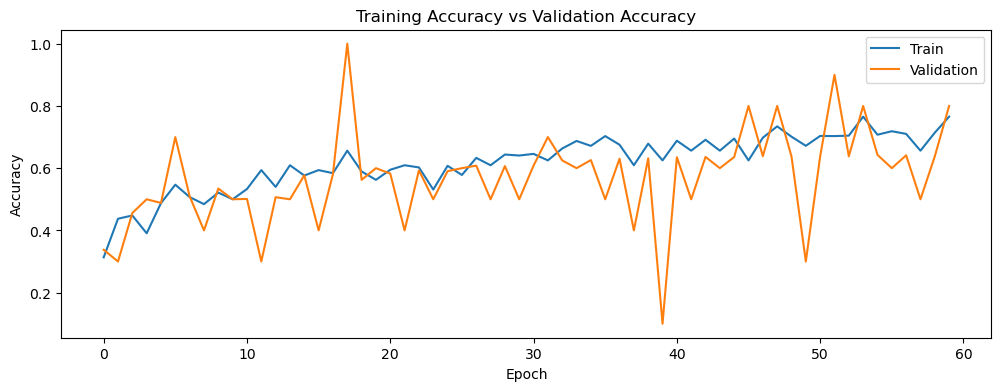

In [22]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1, 1)
train_acc = history.history['accuracy']
fig.set_size_inches(12,4)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Training Accuracy vs Validation Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Validation'])

# Saving the neural network structure

In [24]:
from keras.models import model_from_json 
from pathlib import Path 

model_structure = cnn_model.to_json()
path = Path("cnn_model_structure.json")
path.write_text(model_structure)

11805

In [26]:
cnn_model.save_weights("cnn_model_weights.weights.h5")

In [27]:
from keras.models import model_from_json

# Read the model structure from the JSON file
path = Path("cnn_model_structure.json")
model_structure = path.read_text()

# Reconstruct the model from the JSON string
new_model = model_from_json(model_structure)

new_model.load_weights("cnn_model_weights.weights.h5")

# Show the model architecture
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969,079 (15.14 MB)

 Trainable params: 1,322,919 (5.05 MB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 2,645,840 (10.09 MB)